# CSPC 4810-W01 End of Term Project
### Jose Fernando Tellez ID- 100363335
### Sai Naren Kantipundi ID-100369639
### Edward Thjang ID-100369639
### Srinivasa Sachin Suresh Kumar  ID- 100369196

## Context

The Open Access Series of Imaging Studies (OASIS) is a project aimed at making MRI data sets of the brain freely available to the scientific community. The MRI and Alzheimers dataset containes Magnetic Resonance Imaging Comparisons of Demented and Nondemented adults
The base data consists in two main datasets: 

-__oasis_cross-sectional.csv__- Cross sectional collections of 416 subjects aged 18 to 96

-__oasis_longitudinal.csv__- Longitudinal collection of 150 subjects aged 60 to 96 




In [2]:
#Dataset import 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
crossSectional_df=pd.read_csv("oasis_cross-sectional.csv")
Longitudinal_df=pd.read_csv("oasis_longitudinal.csv")


### Basic Information on selected datasets

In [3]:
crossSectional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [4]:
Longitudinal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


Proposed transformations 

Cleaning NaN values in both datasets

Combine the two datasets 

Perform in depth exploratory analysis 

Average number of visits for demented Non demented patients

Summarize / Use cross validation tables -Binning Age and getting average parameters per group (eTIV, nWBV, ASF)

Boolean queries combined with hierarchical index

Plot scatter plots /correlations between selected variables 





### Data Imputation /Outlier detecting 

In [5]:
crossSectional_df.head(10)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
5,OAS1_0006_MR1,F,R,24,NaN,NaN,NaN,NaN,1131,0.862,1.551,NaN
6,OAS1_0007_MR1,M,R,21,NaN,NaN,NaN,NaN,1516,0.830,1.157,NaN
7,OAS1_0009_MR1,F,R,20,NaN,NaN,NaN,NaN,1505,0.843,1.166,NaN
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,NaN
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,NaN


In [6]:
Longitudinal_df.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [7]:
Longitudinal_df.fillna(method="ffill",inplace=True)

In [8]:
crossSectional_df.fillna(method="ffill",inplace=True)
crossSectional_df.fillna(method="bfill",inplace=True)
crossSectional_df.isna().any()

ID       False
M/F      False
Hand     False
Age      False
Educ     False
SES      False
MMSE     False
CDR      False
eTIV     False
nWBV     False
ASF      False
Delay    False
dtype: bool

In [9]:
Longitudinal_df.fillna(method="ffill",inplace=True)
Longitudinal_df.isna().any()

Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay      False
M/F           False
Hand          False
Age           False
EDUC          False
SES           False
MMSE          False
CDR           False
eTIV          False
nWBV          False
ASF           False
dtype: bool

Check for repeated values in the table keys:

crossSectional_df, key ="ID" 

Longitudinal_df, key = "Subject ID"


In [10]:
crossSectional_df["ID"].duplicated().any()

False

In [11]:
Longitudinal_df["Subject ID"].duplicated().any()

True

Observe structure of duplicated values from Longitudinal_df

In [12]:
Longitudinal_df[Longitudinal_df["Subject ID"].duplicated()==True]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.0,21.0,1.0,1351,0.708,1.299
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


Removal of duplicated values from the Longitudinal_df


In [13]:
Longitudinal_df.drop_duplicates(subset="Subject ID",keep="first",inplace=True)

In [14]:
len(Longitudinal_df)

150

A total of 223 replicated rows were deleted 

### Check For Outliers Via Plots:

#### Check for Outliers for Numerical Variables in Longitudinal Dataset:

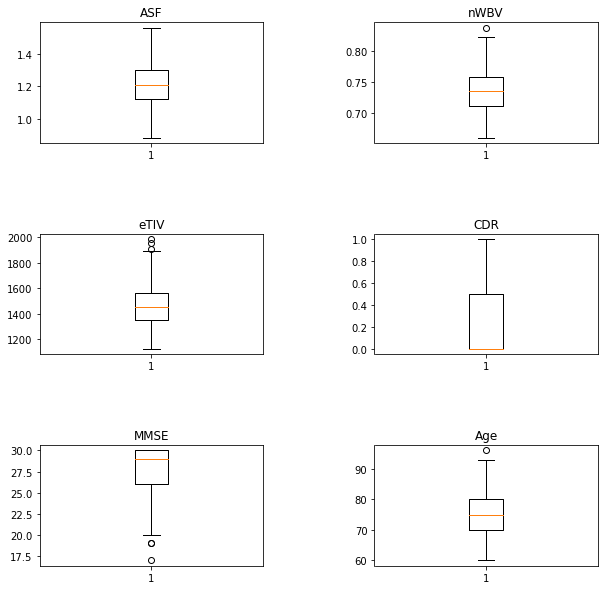

In [93]:
# Eddy Edit:

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

ax1.boxplot(Longitudinal_df['ASF'])
ax2.boxplot(Longitudinal_df['nWBV'])
ax3.boxplot(Longitudinal_df['eTIV'])
ax4.boxplot(Longitudinal_df['CDR'])
ax5.boxplot(Longitudinal_df['MMSE'])
ax6.boxplot(Longitudinal_df['Age'])

ax1.set_title('ASF')
ax2.set_title('nWBV')
ax3.set_title('eTIV')
ax4.set_title('CDR')
ax5.set_title('MMSE')
ax6.set_title('Age')

plt.subplots_adjust(wspace = 0.5, hspace = 0.75)

#### Check for Outliers in Cross-Sectional Dataset:

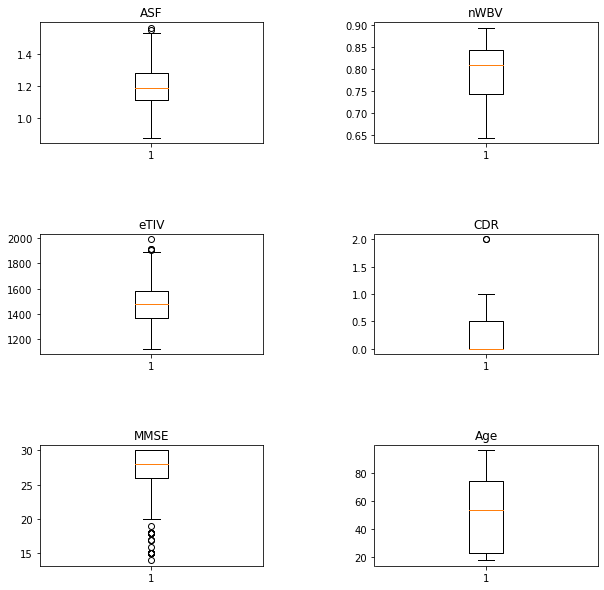

In [92]:
# Eddy Edit:

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

ax1.boxplot(crossSectional_df['ASF'])
ax2.boxplot(crossSectional_df['nWBV'])
ax3.boxplot(crossSectional_df['eTIV'])
ax4.boxplot(crossSectional_df['CDR'])
ax5.boxplot(crossSectional_df['MMSE'])
ax6.boxplot(crossSectional_df['Age'])

ax1.set_title('ASF')
ax2.set_title('nWBV')
ax3.set_title('eTIV')
ax4.set_title('CDR')
ax5.set_title('MMSE')
ax6.set_title('Age')

plt.subplots_adjust(wspace = 0.5, hspace = 0.75)

### Basic descriptive statistics of both datasets

In [17]:
Longitudinal_df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,150.0,150.0,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000
mean,1.0,0.0,75.446667,14.533333,2.486667,27.56000,0.260000,1474.426667,0.736073,1.206333
std,0.0,0.0,7.545421,2.874714,1.127667,2.96847,0.326256,174.683889,0.036458,0.137864
min,1.0,0.0,60.000000,6.000000,1.000000,17.00000,0.000000,1123.000000,0.660000,0.883000
25%,1.0,0.0,70.000000,12.000000,2.000000,26.00000,0.000000,1347.250000,0.710000,1.121000
50%,1.0,0.0,75.000000,14.000000,2.000000,29.00000,0.000000,1453.500000,0.735000,1.207500
75%,1.0,0.0,80.000000,16.000000,3.000000,30.00000,0.500000,1565.250000,0.757750,1.302750
max,1.0,0.0,96.000000,23.000000,5.000000,30.00000,1.000000,1987.000000,0.837000,1.563000


In [18]:
crossSectional_df.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,51.357798,3.240826,2.371560,26.924312,0.275229,1481.919725,0.791670,1.198894,1.896789
std,25.269862,1.242646,1.067608,3.680487,0.360308,158.740866,0.059937,0.128682,6.452720
min,18.000000,1.000000,1.000000,14.000000,0.000000,1123.000000,0.644000,0.881000,1.000000
25%,23.000000,2.000000,1.000000,26.000000,0.000000,1367.750000,0.742750,1.111750,1.000000
50%,54.000000,3.000000,2.000000,28.000000,0.000000,1475.500000,0.809000,1.190000,1.000000
75%,74.000000,4.000000,3.000000,30.000000,0.500000,1579.250000,0.842000,1.284250,1.000000
max,96.000000,5.000000,5.000000,30.000000,2.000000,1992.000000,0.893000,1.563000,89.000000


### Average  and education levels  for males and females (Cross-Sectional Dataset): 


In [19]:
# Eddy Edit:

means_cross = crossSectional_df['Age'].groupby([crossSectional_df['M/F'], crossSectional_df['Educ']]).mean()
means_cross.unstack()

Educ,1.0,2.0,3.0,4.0,5.0
M/F,,,,,
F,60.652174,56.573529,52.703125,50.109091,50.551724
M,75.333333,50.071429,36.390244,47.136364,54.437500


In [20]:
crossSectional_df.loc[:,["M/F","Age"]].groupby(["M/F"]).mean()

,Age
M/F,
F,53.369403
M,48.148810


### Average age for males and females (Longituinal Dataset): 

In [21]:
# Eddy Edit:

means_long = Longitudinal_df['Age'].groupby([Longitudinal_df['M/F'], Longitudinal_df['EDUC']]).mean()
means_long.unstack()

EDUC,6,8,11,12,13,14,15,16,17,18,20,23
M/F,,,,,,,,,,,,
F,NaN,76.333333,72.5,77.083333,74.875,78.25,76.0,72.588235,83.0,75.5,NaN,92.0
M,84.0,88.000000,81.0,74.684211,70.000,76.60,74.0,74.933333,80.0,71.5,76.2,NaN


In [22]:
Longitudinal_df.loc[:,["M/F","Age"]].groupby(["M/F"]).mean()

,Age
M/F,
F,75.840909
M,74.887097


### Average parameter values and number of visits for Demented/NonDemented patients

In [23]:
Longitudinal_df.pivot_table(index=["Group"])

,ASF,Age,CDR,EDUC,MMSE,MR Delay,SES,Visit,eTIV,nWBV
Group,,,,,,,,,,
Converted,1.229429,77.071429,0.035714,15.142857,29.357143,0,1.857143,1,1438.285714,0.737786
Demented,1.204719,75.109375,0.601562,13.687500,25.328125,0,2.703125,1,1475.937500,0.724391
Nondemented,1.203278,75.430556,0.000000,15.166667,29.194444,0,2.416667,1,1480.111111,0.746125


### Binning of Age Variable

First we analyze the distribution of the variable "Age" in order to determine how to appropriately bin it to perform further analysis in cross tabulation




(array([ 8., 14., 20., 28., 22., 28., 12., 10.,  6.,  2.]),
 array([60. , 63.6, 67.2, 70.8, 74.4, 78. , 81.6, 85.2, 88.8, 92.4, 96. ]),
 <BarContainer object of 10 artists>)

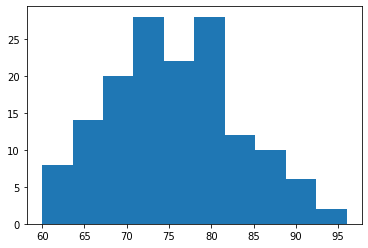

In [24]:
plt.hist(Longitudinal_df["Age"])

Categories for binning 

60<age<70 = Lower bracket 

70<age<80 = Lower middle bracket 

80<age<90 = Upper middle bracket

90<age = Upper bracket 


In [54]:
def Bin_Age(dataset,column="Age"):
    dataset.loc[(dataset[column]>=60)&(dataset[column]<70),"Age_Binned"]="Lower Bracket"
    dataset.loc[(dataset[column]>=70)&(dataset[column]<80),"Age_Binned"]="Lower middle Bracket"
    dataset.loc[(dataset[column]>=80)&(dataset[column]<90),"Age_Binned"]="Upper middle Bracket"
    dataset.loc[(dataset[column]>=90),"Age_Binned"]="Upper middle Bracket"
    dataset.loc[(dataset[column]<60),"Age_Binned"]="Middle Age"

In [55]:
Bin_Age(Longitudinal_df)
Longitudinal_df.head(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Age_Binned
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,Upper middle Bracket
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046,Lower middle Bracket
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444,Upper middle Bracket
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039,Upper middle Bracket
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,4.0,28.0,0.5,1357,0.748,1.293,Lower middle Bracket


Check if there are missing values in the newly created column

In [56]:
Longitudinal_df["Age_Binned"].isna().any()

False

Pivot table for the effects of age and group in the MR scan measurements

In [57]:
longitudinal_pivotTable=Longitudinal_df.pivot_table(index=["Group","Age_Binned"])
longitudinal_pivotTable

ASF        Age       CDR       EDUC  \
Group       Age_Binned                                                       
Converted   Lower Bracket         1.268750  67.250000  0.125000  14.500000   
            Lower middle Bracket  1.162250  76.250000  0.000000  15.500000   
            Upper middle Bracket  1.248000  84.166667  0.000000  15.333333   
Demented    Lower Bracket         1.166000  65.727273  0.636364  14.272727   
            Lower middle Bracket  1.205139  73.972222  0.597222  13.833333   
            Upper middle Bracket  1.228882  83.588235  0.588235  13.000000   
Nondemented Lower Bracket         1.233632  65.368421  0.000000  15.105263   
            Lower middle Bracket  1.198226  74.741935  0.000000  15.645161   
            Upper middle Bracket  1.184182  85.090909  0.000000  14.545455   

                                       MMSE  MR Delay       SES  Visit  \
Group       Age_Binned                                                   
Converted   Lower Bracket         30.000000         0  2.500000      1   
            Lower middle Bracket  28.750000         0  1.500000      1   
            Upper middle Bracket  29.333333         0  1.666667      1   
Demented    Lower Bracket         24.818182         0  2.545455      1   
            Lower middle Bracket  25.555556         0  2.722222      1   
            Upper middle Bracket  25.176471         0  2.764706      1   
Nondemented Lower Bracket         29.368421         0  2.473684      1   
            Lower middle Bracket  29.258065         0  2.258065      1   
            Upper middle Bracket  28.954545         0  2.590909      1   

                                         eTIV      nWBV  
Group       Age_Binned                                   
Converted   Lower Bracket         1387.500000  0.774250  
            Lower middle Bracket  1528.000000  0.736750  
            Upper middle Bracket  1412.333333  0.714167  
Demented    Lower Bracket         1521.727273  0.746000  
            Lower middle Bracket  1477.166667  0.726333  
            Upper middle Bracket  1443.705882  0.706294  
Nondemented Lower Bracket         1435.789474  0.783632  
            Lower middle Bracket  1484.354839  0.740097  
            Upper middle Bracket  1512.409091  0.722227

We needed a measured variable that showed a clear pattern between the Converted/Demented/NonDemented groups in order to build a function that would allow the prediction of the group in terms of a measured variable. The most clear pattern was detected for the variable CDR as shown in the barplot below.

In [58]:
data=longitudinal_pivotTable["CDR"]
index=longitudinal_pivotTable["ASF"].index
extracted_index=[i[0] for i in index.values]

<AxesSubplot:xlabel='Group,Age_Binned'>

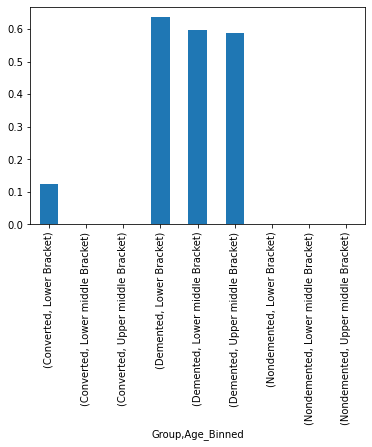

In [59]:
data.plot.bar()

Based on the observed pattern , the follwing prediction function is proposed:

0<CDR<0.1 Group-> NonDemented

0.1<CDR<0.3 Group -> Converted 

CDR>0.3  Group -> Demented 

In [60]:
def group_prediction(dataset,column="CDR"):
    dataset.loc[(dataset[column]>=0)&(dataset[column]<=0.1),"Group"]="NonDemented"
    dataset.loc[(dataset[column]>=0.1)&(dataset[column]<=0.3),"Group"]="Converted"
    dataset.loc[(dataset[column]>=0.3),"Group"]="Demented"
    
    

Run Bin_Age, group_prediction on crossSectional_df

In [32]:
Bin_Age(crossSectional_df)
group_prediction(crossSectional_df)

crossSectional_df.head(5)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Age_Binned,Group
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,1.0,Lower middle Bracket,NonDemented
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,1.0,Middle Age,NonDemented
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,1.0,Lower middle Bracket,Demented
3,OAS1_0004_MR1,M,R,28,4.0,3.0,27.0,0.5,1588,0.803,1.105,1.0,Middle Age,Demented
4,OAS1_0005_MR1,M,R,18,4.0,3.0,27.0,0.5,1737,0.848,1.010,1.0,Middle Age,Demented


Pivot table to obtain the average values per age group bracket 

In [61]:
crossSectional_df.pivot_table(index=["Group","Age_Binned"])

ASF        Age       CDR     Delay  \
Group       Age_Binned                                                      
Demented    Lower Bracket         1.216933  66.133333  0.600000  1.000000   
            Lower middle Bracket  1.195646  74.416667  0.687500  1.000000   
            Middle Age            1.183954  27.505747  0.609195  1.000000   
            Upper middle Bracket  1.191757  84.108108  0.675676  1.000000   
NonDemented Lower Bracket         1.257320  64.880000  0.000000  1.000000   
            Lower middle Bracket  1.221914  73.371429  0.000000  1.000000   
            Middle Age            1.186662  32.337748  0.000000  3.589404   
            Upper middle Bracket  1.226000  85.526316  0.000000  1.000000   

                                      Educ       MMSE       SES         eTIV  \
Group       Age_Binned                                                         
Demented    Lower Bracket         2.533333  22.933333  2.733333  1448.533333   
            Lower middle Bracket  3.041667  24.687500  2.479167  1487.958333   
            Middle Age            3.103448  24.528736  2.310345  1503.689655   
            Upper middle Bracket  2.648649  24.405405  2.810811  1492.567568   
NonDemented Lower Bracket         3.280000  29.160000  2.760000  1403.920000   
            Lower middle Bracket  3.228571  29.142857  2.400000  1454.342857   
            Middle Age            3.582781  28.708609  2.145695  1496.119205   
            Upper middle Bracket  3.289474  28.657895  2.421053  1447.552632   

                                      nWBV  
Group       Age_Binned                      
Demented    Lower Bracket         0.740867  
            Lower middle Bracket  0.728333  
            Middle Age            0.840471  
            Upper middle Bracket  0.706135  
NonDemented Lower Bracket         0.794400  
            Lower middle Bracket  0.754029  
            Middle Age            0.835119  
            Upper middle Bracket  0.723500

### Boolean exploration 

For Longitudinal scans , what is the minimum age for demented male and female patients? 

In [62]:
print("The minimum age for Demented females in longitudinal scans is:", Longitudinal_df[(Longitudinal_df["Group"]=="Demented") &
               (Longitudinal_df["M/F"]=="F")]["Age"].min())

The minimum age for Demented females in longitudinal scans is: 66


In [35]:
print("The minimum age for Demented males in longitudinal scans is:", Longitudinal_df[(Longitudinal_df["Group"]=="Demented") &
               (Longitudinal_df["M/F"]=="M")]["Age"].min())

The minimum age for Demented males in longitudinal scans is: 61


For Longitudinal scans, what percentage of male demented patients are over the age of 70? 

In [63]:
query=len(Longitudinal_df[(Longitudinal_df["M/F"]=="M")&
                     (Longitudinal_df["Group"]=="Demented")&
                     (Longitudinal_df["Age"]>70)])
percentage=(query/len(Longitudinal_df))*100
print("The percentage of male demented patients over the age of 70 for Longitudinal scans is %d percent"%percentage)

The percentage of male demented patients over the age of 70 for Longitudinal scans is 16 percent


Hoy many average visits do demented patients log in for Longitudinal scans

In [64]:
query=Longitudinal_df[Longitudinal_df["Group"]=="Demented"]["Visit"].mean()
print("Demented patients average %d visits for Longitudinal scans"%query)

Demented patients average 1 visits for Longitudinal scans


### Joining of Cross Sectional and Longitudinal Scans datasets 

The longitudinal and cross sectional data is joined in a single dataset to be able to perform cross visualization on them. 
Since the two tables do not have common primary keys , the method of concat is utilized to stack the 2 datasets vertically

In [87]:
df_scans_joined=Longitudinal_df.merge(crossSectional_df,on="Age_Binned",how="inner",validate="m:m")
df_scans_joined.head(5)

,Subject ID,MRI ID,Group_x,Visit,MR Delay,M/F_x,Hand_x,Age_x,EDUC,SES_x,...,Age_y,Educ,SES_y,MMSE_y,CDR_y,eTIV_y,nWBV_y,ASF_y,Delay,Group_y
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,...,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,1.0,NonDemented
1,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,...,82,2.0,4.0,27.0,0.5,1477,0.739,1.188,1.0,Demented
2,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,...,89,5.0,1.0,30.0,0.0,1536,0.715,1.142,1.0,NonDemented
3,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,...,80,3.0,3.0,23.0,0.5,1794,0.765,0.978,1.0,Demented
4,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,...,82,2.0,3.0,27.0,0.5,1420,0.710,1.236,1.0,Demented


In [67]:
df_scans_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10628 entries, 0 to 10627
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  10628 non-null  object 
 1   MRI ID      10628 non-null  object 
 2   Group_x     10628 non-null  object 
 3   Visit       10628 non-null  int64  
 4   MR Delay    10628 non-null  int64  
 5   M/F_x       10628 non-null  object 
 6   Hand_x      10628 non-null  object 
 7   Age_x       10628 non-null  int64  
 8   EDUC        10628 non-null  int64  
 9   SES_x       10628 non-null  float64
 10  MMSE_x      10628 non-null  float64
 11  CDR_x       10628 non-null  float64
 12  eTIV_x      10628 non-null  int64  
 13  nWBV_x      10628 non-null  float64
 14  ASF_x       10628 non-null  float64
 15  Age_Binned  10628 non-null  object 
 16  ID          10628 non-null  object 
 17  M/F_y       10628 non-null  object 
 18  Hand_y      10628 non-null  object 
 19  Age_y       10628 non-nul

Check if there any missing values in the merged dataset

In [84]:
df_scans_joined.isna().any()

Subject ID    False
MRI ID        False
Group_x       False
Visit         False
MR Delay      False
M/F_x         False
Hand_x        False
Age_x         False
EDUC          False
SES_x         False
MMSE_x        False
CDR_x         False
eTIV_x        False
nWBV_x        False
ASF_x         False
Age_Binned    False
ID            False
M/F_y         False
Hand_y        False
Age_y         False
Educ          False
SES_y         False
MMSE_y        False
CDR_y         False
eTIV_y        False
nWBV_y        False
ASF_y         False
Delay         False
Group_y       False
dtype: bool

In [99]:
df_scans_joined.drop_duplicates(keep="first",subset=["Subject ID","MRI ID"],inplace=True)
pd.options.display.max_columns=100

In [100]:
df_scans_joined

,Subject ID,MRI ID,Group_x,Visit,MR Delay,M/F_x,Hand_x,Age_x,EDUC,SES_x,MMSE_x,CDR_x,eTIV_x,nWBV_x,ASF_x,Age_Binned,ID,M/F_y,Hand_y,Age_y,Educ,SES_y,MMSE_y,CDR_y,eTIV_y,nWBV_y,ASF_y,Delay,Group_y
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,Upper middle Bracket,OAS1_0013_MR1,F,R,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,1.0,NonDemented
75,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444,Upper middle Bracket,OAS1_0013_MR1,F,R,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,1.0,NonDemented
150,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039,Upper middle Bracket,OAS1_0013_MR1,F,R,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,1.0,NonDemented
225,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380,Upper middle Bracket,OAS1_0013_MR1,F,R,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,1.0,NonDemented
300,OAS2_0013,OAS2_0013_MR1,Nondemented,1,0,F,R,81,12,4.0,30.0,0.0,1230,0.715,1.427,Upper middle Bracket,OAS1_0013_MR1,F,R,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,1.0,NonDemented
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10428,OAS2_0152,OAS2_0152_MR1,Nondemented,1,0,F,R,66,18,2.0,29.0,0.0,1191,0.785,1.474,Lower Bracket,OAS1_0022_MR1,F,R,69,2.0,4.0,23.0,0.5,1447,0.757,1.213,1.0,Demented
10468,OAS2_0174,OAS2_0174_MR1,Nondemented,1,0,M,R,60,12,4.0,30.0,0.0,1379,0.806,1.273,Lower Bracket,OAS1_0022_MR1,F,R,69,2.0,4.0,23.0,0.5,1447,0.757,1.213,1.0,Demented
10508,OAS2_0177,OAS2_0177_MR1,Nondemented,1,0,M,R,68,14,3.0,26.0,0.0,1444,0.778,1.216,Lower Bracket,OAS1_0022_MR1,F,R,69,2.0,4.0,23.0,0.5,1447,0.757,1.213,1.0,Demented
10548,OAS2_0183,OAS2_0183_MR1,Nondemented,1,0,F,R,66,13,2.0,30.0,0.0,1495,0.746,1.174,Lower Bracket,OAS1_0022_MR1,F,R,69,2.0,4.0,23.0,0.5,1447,0.757,1.213,1.0,Demented


Change the column names so they are more readable

In [103]:
merged_columns=["Subject ID",
        "MRI ID",
        "Group_Long",
        "Visit",
        "MR Delay",
        "M/F_Long",
        "Hand_Long",
        "Age_Long",
        "EDUC_Long",
        "SES_Long",
        "MMSE_Long",
        "CDR_Long",
        "eTIV_Long",
        "nWBV_Long",
        "ASF_Long",
        "Age_Binned",
        "ID",
        "M/F_Sec",
        "Hand_Sec",
        "Age_Sec",
        "EDUC_Sec",
        "SES_Sec",
        "MMSE_Sec",
        "CDR_Sec",
        "eTIV_Sec",
        "nWBV_Sec",
        "ASF_Sec",
        "Delay",
        "Group_Sec"]
df_scans_joined.columns=merged_columns
df_scans_joined.head(5)

,Subject ID,MRI ID,Group_Long,Visit,MR Delay,M/F_Long,Hand_Long,Age_Long,EDUC_Long,SES_Long,MMSE_Long,CDR_Long,eTIV_Long,nWBV_Long,ASF_Long,Age_Binned,ID,M/F_Sec,Hand_Sec,Age_Sec,EDUC_Sec,SES_Sec,MMSE_Sec,CDR_Sec,eTIV_Sec,nWBV_Sec,ASF_Sec,Delay,Group_Sec
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,Upper middle Bracket,OAS1_0013_MR1,F,R,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,1.0,NonDemented
75,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444,Upper middle Bracket,OAS1_0013_MR1,F,R,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,1.0,NonDemented
150,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039,Upper middle Bracket,OAS1_0013_MR1,F,R,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,1.0,NonDemented
225,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380,Upper middle Bracket,OAS1_0013_MR1,F,R,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,1.0,NonDemented
300,OAS2_0013,OAS2_0013_MR1,Nondemented,1,0,F,R,81,12,4.0,30.0,0.0,1230,0.715,1.427,Upper middle Bracket,OAS1_0013_MR1,F,R,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,1.0,NonDemented


### Data Visualization

Pivot table by age in both measurement datasets

In [109]:
pivot_table=df_scans_joined.pivot_table(index=["Group_Long","Group_Sec","Age_Binned"])
pivot_table

ASF_Long  ASF_Sec   Age_Long  \
Group_Long  Group_Sec   Age_Binned                                           
Converted   Demented    Lower Bracket         1.268750    1.213  67.250000   
            NonDemented Lower middle Bracket  1.162250    1.306  76.250000   
                        Upper middle Bracket  1.248000    1.055  84.166667   
Demented    Demented    Lower Bracket         1.166000    1.213  65.727273   
            NonDemented Lower middle Bracket  1.205139    1.306  73.972222   
                        Upper middle Bracket  1.228882    1.055  83.588235   
Nondemented Demented    Lower Bracket         1.233632    1.213  65.368421   
            NonDemented Lower middle Bracket  1.198226    1.306  74.741935   
                        Upper middle Bracket  1.184182    1.055  85.090909   

                                              Age_Sec  CDR_Long  CDR_Sec  \
Group_Long  Group_Sec   Age_Binned                                         
Converted   Demented    Lower Bracket              69  0.125000      0.5   
            NonDemented Lower middle Bracket       74  0.000000      0.0   
                        Upper middle Bracket       81  0.000000      0.0   
Demented    Demented    Lower Bracket              69  0.636364      0.5   
            NonDemented Lower middle Bracket       74  0.597222      0.0   
                        Upper middle Bracket       81  0.588235      0.0   
Nondemented Demented    Lower Bracket              69  0.000000      0.5   
            NonDemented Lower middle Bracket       74  0.000000      0.0   
                        Upper middle Bracket       81  0.000000      0.0   

                                              Delay  EDUC_Long  EDUC_Sec  \
Group_Long  Group_Sec   Age_Binned                                         
Converted   Demented    Lower Bracket           1.0  14.500000       2.0   
            NonDemented Lower middle Bracket    1.0  15.500000       2.0   
                        Upper middle Bracket    1.0  15.333333       5.0   
Demented    Demented    Lower Bracket           1.0  14.272727       2.0   
            NonDemented Lower middle Bracket    1.0  13.833333       2.0   
                        Upper middle Bracket    1.0  13.000000       5.0   
Nondemented Demented    Lower Bracket           1.0  15.105263       2.0   
            NonDemented Lower middle Bracket    1.0  15.645161       2.0   
                        Upper middle Bracket    1.0  14.545455       5.0   

                                              MMSE_Long  MMSE_Sec  MR Delay  \
Group_Long  Group_Sec   Age_Binned                                            
Converted   Demented    Lower Bracket         30.000000      23.0         0   
            NonDemented Lower middle Bracket  28.750000      29.0         0   
                        Upper middle Bracket  29.333333      30.0         0   
Demented    Demented    Lower Bracket         24.818182      23.0         0   
            NonDemented Lower middle Bracket  25.555556      29.0         0   
                        Upper middle Bracket  25.176471      30.0         0   
Nondemented Demented    Lower Bracket         29.368421      23.0         0   
            NonDemented Lower middle Bracket  29.258065      29.0         0   
                        Upper middle Bracket  28.954545      30.0         0   

                                              SES_Long  SES_Sec  Visit  \
Group_Long  Group_Sec   Age_Binned                                       
Converted   Demented    Lower Bracket         2.500000      4.0      1   
            NonDemented Lower middle Bracket  1.500000      3.0      1   
                        Upper middle Bracket  1.666667      2.0      1   
Demented    Demented    Lower Bracket         2.545455      4.0      1   
            NonDemented Lower middle Bracket  2.722222      3.0      1   
                        Upper middle Bracket  2.764706      2.0      1   
Nondemented Demented    Lower Bracket         2.473

plt.plot(df_scans_joined[

## Additional Dataset (Alzheimer_s_Disease_and_Healthy_Aging_Data)

In [186]:
#Dataswet Import
gg_df=pd.read_csv("Alzheimer_s_Disease_and_Healthy_Aging_Data.csv")

In [187]:
gg_df.head(5)

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Response,...,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,Report
0,2016~2016~12~Q27~AGE~AGE_OVERALL~GENDER~MALE,2016,2016,FL,Florida,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,12,AGE,AGE_OVERALL,GENDER,MALE,NaN,NaN,NaN
1,2015~2015~66~Q43~AGE~5064~GENDER~MALE,2015,2015,GU,Guam,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,66,AGE,5064,GENDER,MALE,NaN,NaN,NaN
2,2018~2018~66~Q18~AGE~5064~GENDER~MALE,2018,2018,GU,Guam,BRFSS,Screenings and Vaccines,Influenza vaccine within past year,Percentage of older adults who reported influe...,NaN,...,Q18,NaN,66,AGE,5064,GENDER,MALE,NaN,NaN,NaN
3,2018~2018~66~Q34~AGE~5064~GENDER~FEMALE,2018,2018,GU,Guam,BRFSS,Overall Health,Prevalence of sufficient sleep,Percentage of older adults getting sufficient ...,NaN,...,Q34,NaN,66,AGE,5064,GENDER,FEMALE,NaN,NaN,NaN
4,2015~2015~16~Q43~AGE~65PLUS~GENDER~FEMALE,2015,2015,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,16,AGE,65PLUS,GENDER,FEMALE,NaN,NaN,NaN


In [191]:
index_list=list(gg_df.loc[:,"RowId"].str.split("~"))

### Identifying Relevant Health issue classes

In [193]:
gender_value=[]
for index in index_list:
    if index in ["FEMALE","MALE"]:
        if index.contains("FEMALE"):
            gender_value.append("FEMALE")
        else:
            gender_value.append("MALE")


[]

In [64]:
gg_df["Class"].unique()

array(['Mental Health', 'Overall Health', 'Screenings and Vaccines',
       'Nutrition/Physical Activity/Obesity', 'Caregiving',
       'Smoking and Alcohol Use', 'Cognitive Decline'], dtype=object)

### Filtering Dataset by classes and percentage values [2 classes selected]

In [65]:
gg_df1=gg_df[gg_df["Class"]=="Cognitive Decline"]
gg_df1=gg_df1.loc[gg_df1["Data_Value_Type"]=="Percentage"]


In [6]:
gg_df2=gg_df.loc[gg_df["Class"]=="Mental Health"]
gg_df2=gg_df2.loc[gg_df2["Data_Value_Type"]=="Percentage"]


### Identifying relevant health topics under each class

In [67]:
gg_df1["Topic"].unique()

array(['Need assistance with day-to-day activities because of subjective cognitive decline or memory loss',
       'Functional difficulties associated with subjective cognitive decline or memory loss among older adults',
       'Talked with health care professional about subjective cognitive decline or memory loss',
       'Subjective cognitive decline or memory loss among older adults'],
      dtype=object)

In [7]:
gg_df2["Topic"].unique()

array(['Lifetime diagnosis of depression', 'Frequent mental distress'],
      dtype=object)

### Assessing percentage distribution/mean by Topic

In [69]:
gg_df1.groupby(["Topic"]).mean()["Data_Value"]

Topic
Functional difficulties associated with subjective cognitive decline or memory loss among older adults    38.733781
Need assistance with day-to-day activities because of subjective cognitive decline or memory loss         33.225238
Subjective cognitive decline or memory loss among older adults                                            11.702755
Talked with health care professional about subjective cognitive decline or memory loss                    44.687573
Name: Data_Value, dtype: float64

(array([ 891., 2322., 1506., 2252., 2165., 1005.,  239.,   78.,   30.,
           9.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

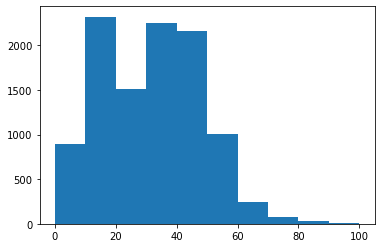

In [73]:
plt.hist(gg_df1["Data_Value"])

In [71]:
gg_df2.groupby(["Topic"]).mean()["Data_Value"]

Topic
Frequent mental distress            10.768843
Lifetime diagnosis of depression    18.193050
Name: Data_Value, dtype: float64

(array([5.290e+02, 3.185e+03, 2.931e+03, 1.631e+03, 5.840e+02, 1.850e+02,
        4.000e+01, 1.200e+01, 2.000e+00, 3.000e+00]),
 array([ 0.9 ,  6.54, 12.18, 17.82, 23.46, 29.1 , 34.74, 40.38, 46.02,
        51.66, 57.3 ]),
 <a list of 10 Patch objects>)

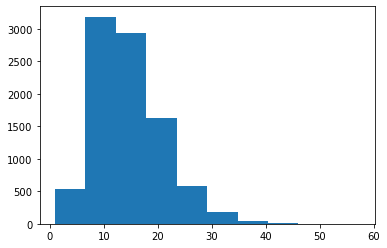

In [74]:
plt.hist(gg_df2["Data_Value"]) 